# Régression linéaire avec TensorFlow 

Dans ce notebook, on va voir comment utiliser TensorFlow pour entraîner un modèle de régression linéaire sur le jeu de données de *Boston* de Sklearn. 
Le but sera de prédire  le prix des maisons en fonction de leurs caractéristiques. 

## Importation des packages

In [3]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import MeanAbsoluteError
from tensorflow.keras.optimizers import SGD

## Importation des données

In [4]:
boston = load_boston()
X = pd.DataFrame(data=boston['data'], columns=boston['feature_names'])

X_train, X_test, y_train, y_test = train_test_split(X, boston['target'], test_size=0.33, random_state=42)

std_scaler = StandardScaler().fit(X_train, y_train)

X_train  =  std_scaler.transform(X_train)
X_test = std_scaler.transform(X_test)

X_train_tf = tf.convert_to_tensor(X_train)
X_test_tf = tf.convert_to_tensor(X_test)
y_train_tf = tf.convert_to_tensor(y_train)
y_test_tf = tf.convert_to_tensor(y_test)

## Création de l'architecture

La fonction `Dense` nous permet d'initialiser les poids de notre régression linéaire et d'appliquer une multiplication matricielle entre nos poids et nos exemples. 

Pour plus d'informatons, n'hésitez pas à lire la [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense).

In [18]:
def linear_regression(input):
  model = Sequential([Dense(input)])

  return model

Initialiser notre modèle.

In [19]:
rl_model = linear_regression(1)

Prédire notre jeu d'entraînement.

In [21]:
prediction = rl_model(X_train_tf)

In [22]:
mean_absolute_error(prediction, y_train)

22.970796457893286

## Définir la fonction de coût

Nous allons maintenant initialiser notre fonction de coût.

Vous pouvez trouver les différentes fonctions de coût implémenter par TensorFlow dans la [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/losses).

In [23]:
loss = MeanAbsoluteError()

## Définir l'algorithme d'optimisation

Nous allons maintenant initialiser notre fonction d'optimisation qui va mettre à jour nos poids. Il existe des améliorations du gradient descent censé être plus rapide et performant. 

Vous pouvez trouver les différents algorithmes d'optimisation implémenter par Tensorflow dans la [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers).

In [24]:
opt = SGD(lr=0.01)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


## Définir la fonction d'entraînement

Nous allons maintenant initialiser la fonction d'entraînement de notre modèle en utilisant notre modèle, notre fonction de coût et notre algorithme d'optimisation.

In [25]:
def step(model, opt, loss, X, y):

  # garder la trace de nos gradients
  with tf.GradientTape() as tape:
    # faire une prédiction en utilisant le modèle, puis calculer le coût
	  pred = model(X)
	  train_loss = loss(y, pred)
  
	# calculer les gradients en utilisant tape 
  grads = tape.gradient(train_loss, model.trainable_variables)

  # mettre à jour les poids du modèle
  opt.apply_gradients(zip(grads, model.trainable_variables))
 
  return model, train_loss

In [15]:
tf.__version__

'2.5.0'

## Entraîner notre modèle

Il est maintenant temps d'entraîner notre modèle

In [28]:
rl_model.trainable_variables

[<tf.Variable 'dense_1/kernel:0' shape=(13, 1) dtype=float32, numpy=
 array([[-0.38911614],
        [-0.35326824],
        [-0.3068586 ],
        [ 0.34133884],
        [-0.16365716],
        [ 0.43698207],
        [ 0.07242782],
        [ 0.66619056],
        [-0.28672627],
        [ 0.02095295],
        [ 0.01528444],
        [-0.02600959],
        [ 0.0947236 ]], dtype=float32)>,
 <tf.Variable 'dense_1/bias:0' shape=(1,) dtype=float32, numpy=array([9.883861], dtype=float32)>]

In [27]:
epoch = 1000
history_train = []
history_test = []

for e in range(epoch) : 

  # mise à jour des poids
  rl_model, train_loss = step(rl_model, opt, loss, X_train_tf, y_train_tf)

  # prédiction sur le jeu de test
  test_pred = rl_model(X_test_tf)
  test_loss = mean_absolute_error(test_pred, y_test)

  # sauvegarde des coûts
  history_train = np.append(history_train, train_loss)
  history_test = np.append(history_test, test_loss)

  print('train_loss : '+str(np.squeeze(train_loss))+ ' test_loss : '+str(test_loss))


train_loss : 22.970797 test_loss : 21.647814332178516
train_loss : 22.960796 test_loss : 21.637814356750265
train_loss : 22.950796 test_loss : 21.627814384595585
train_loss : 22.940798 test_loss : 21.617814411648997
train_loss : 22.930798 test_loss : 21.607814436131516
train_loss : 22.920795 test_loss : 21.597814464082795
train_loss : 22.910797 test_loss : 21.587814488788382
train_loss : 22.900797 test_loss : 21.57781451003637
train_loss : 22.890799 test_loss : 21.567814528406736
train_loss : 22.880796 test_loss : 21.55781455338001
train_loss : 22.870796 test_loss : 21.54781458156551
train_loss : 22.860796 test_loss : 21.537814604776525
train_loss : 22.850796 test_loss : 21.52781463191359
train_loss : 22.840797 test_loss : 21.517814659206806
train_loss : 22.830797 test_loss : 21.50781468395701
train_loss : 22.820797 test_loss : 21.49781470495962
train_loss : 22.810797 test_loss : 21.487814724802256
train_loss : 22.800797 test_loss : 21.477814748615558
train_loss : 22.790796 test_loss :

Visualisation de l'évolution du coût pendant l'entraînement. 

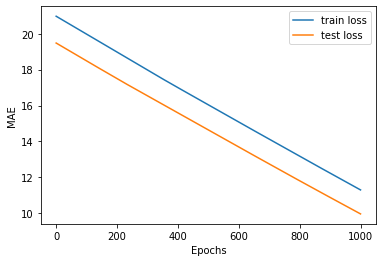

In [ ]:
plt.plot(np.arange(epoch), history_train, label='train loss')
plt.plot(np.arange(epoch), history_test, label='test loss')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

## Sauvegarde du modèle

Maintenant que notre modèle est entraîné, il est temps de le sauvegarder.

In [29]:
rl_model.save_weights('linear_regression')

Initalisons à nouveau notre modèlre à random.

In [30]:
rl_model = linear_regression(1)

In [31]:
prediction = rl_model(X_train_tf)
mean_absolute_error(prediction, y_train)

22.97079646114197

Nous pouvons revenir à nos poids entraîner en charger nos précédens poids.

In [32]:
rl_model.load_weights('linear_regression')

In [33]:
prediction = rl_model(X_train_tf)
mean_absolute_error(prediction, y_train)

13.128006919928355